
# Project: tmdb Movies Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>

</ul>

<a id='intro'></a>
## Introduction

> Info: This data set contains information about more than 10,000 movies collected from The Movie Database (TMDB), including user ratings and revenue, it consists of 21 columns each represent unique info about the movie as imdb_id, budget, revenue, genres & vote counts.
>
> Questions:
> 0. correlation between revenue and popularity
> 1. what are the Highest movies revenue over the years 
> 3. How many movies were release in per year?
> 4. Which year generated the highest revenue?
> 5. Which movie has the highest runtime and which movie has the lowest runtime?

## Importing the neccesary libraries to be used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
# Data Wrangling



### General Properties

## The display of the first 5 rows of our data 


In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


### Drop irrelevant columns for our current analysis


In [3]:
df.drop(
    ['homepage','tagline','production_companies','keywords','overview'\
     ,'imdb_id','id','release_date'], inplace = True, axis = 1)
df.head(1)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


## checking for the number of rows and columns in the dataset

In [4]:
df.shape

# there are 10866 rows and 21 columns in the dataset

(10866, 13)

## checking for duplicated data in the dataframe

In [6]:
df[df.duplicated()]


,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,110,5.0,2010,30000000.0,967000.0


checking for any duplicated values and we found one

## droping the duplicated values


In [7]:
df.drop_duplicates(inplace=True)

## checking if there's still duplicated data

In [8]:
df.duplicated().sum()

0

## checking for misssing values 


In [9]:
df.isna().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

there are missing values in our dataset and we are going to drop them

## removing every rows with missing values

In [10]:
df.dropna(how='all', inplace=True)

In [11]:
df.shape

(10865, 13)

## checking to see if there is still missing values 

In [12]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

Now we dont have any missing row 

### drop rows that contain zeros values in (revenue_adj,budget_adj,runtime)

In [13]:
zero_data = df[(df.revenue_adj == 0)|(df.budget_adj == 0)|(df.runtime == 0)]

df.drop(zero_data.index,inplace=True)
# df.replace(0, np.nan)
# df.drop.np.nan

df

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,Drama,74,7.5,1966,5.038511e+07,2.266436e+08
10828,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,Mystery|Thriller,46,6.3,1966,2.015404e+07,8.733419e+07
10829,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,Action|Western,36,6.9,1966,3.125892e+07,4.030809e+07
10835,0.299911,12000000,20000000,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action|Adventure|Drama|War|Romance,28,7.0,1966,8.061618e+07,1.343603e+08


In [14]:
df.shape

(3854, 13)

## checking for the datatypes in the dataset


In [15]:
list_col = list(df.columns)
check = pd.DataFrame()
a = []
b = []
for c in list_col:
    a.append(df[c].dtype)
    b.append(df[c].nunique())
check["name_columns"] = list_col
check["dtype"] = a
check["unique"] = b
check

,name_columns,dtype,unique
0,popularity,float64,3852
1,budget,int64,407
2,revenue,int64,3753
3,original_title,object,3808
4,cast,object,3829
5,director,object,1713
6,runtime,int64,139
7,genres,object,1053
8,vote_count,int64,1274
9,vote_average,float64,53


## changing the data type of some columns with wrong datatype


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 13 columns):
popularity        3854 non-null float64
budget            3854 non-null int64
revenue           3854 non-null int64
original_title    3854 non-null object
cast              3850 non-null object
director          3853 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 421.5+ KB


## statistical description of the dataset


In [17]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### How many movies were released per year?

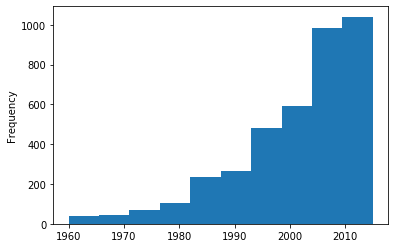

In [18]:
# data release over time 
df.release_year.plot(kind='hist',x="release_year",y="Distrbution");

There were more movies released in the 2010s

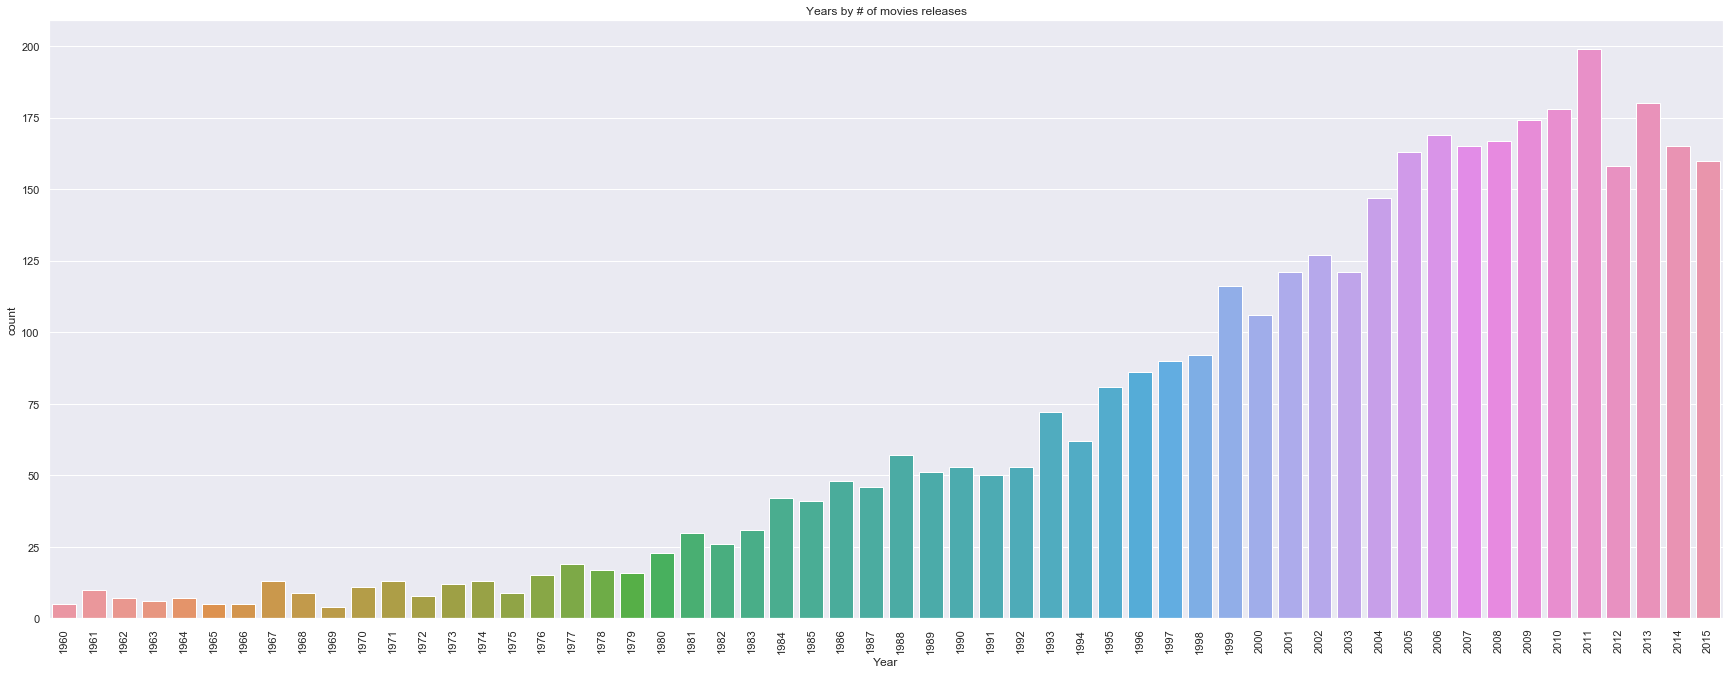

In [20]:
plt1 =sns.countplot(x="release_year", data=df)
sns.set(rc = {'figure.figsize':(30,11)})
plt1.set_title("Years by # of movies releases")
plt1.set(xlabel = "Year")
plt.xticks(rotation=90)
plt.show()

The above plot show the breakdown of movies released over the years, more movies were released in 2011 followed by 2013.

## Which year generated the highest revenue?

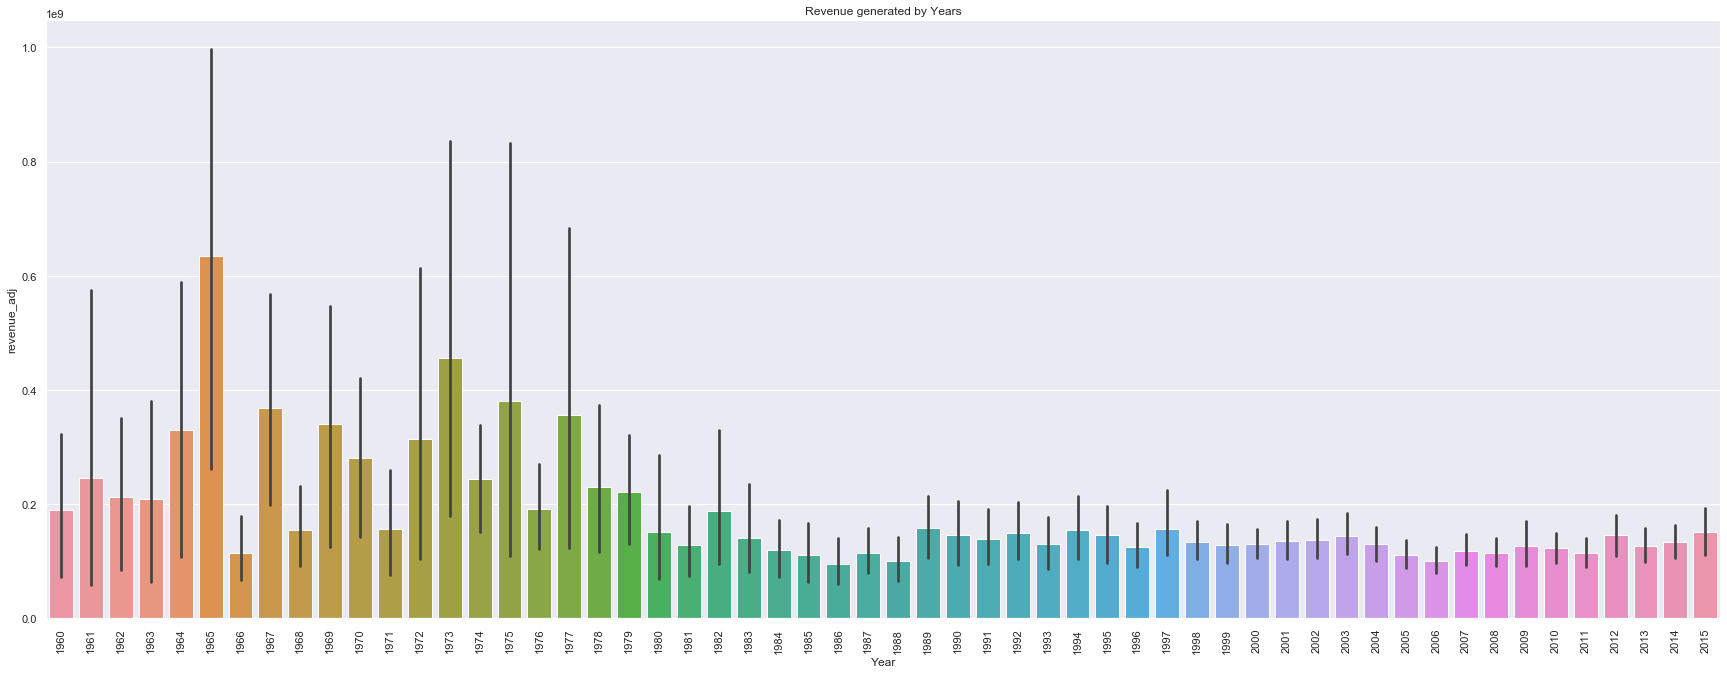

In [21]:
plt2 =sns.barplot(x="release_year", y="revenue_adj", data=df)
# sns.set(rc = {'figure.figsize':(30,11)})

plt2.set_title("Revenue generated by Years")
plt2.set(xlabel = "Year")
plt.xticks(rotation=90)
plt.show()

According to the above plot there more revenue generated in 1977

## Which movie has the highest runtime 

In [22]:
df.runtime.max()

338

In [24]:
highest_runtime = df[df['runtime']==df.runtime.max()]
highest_runtime

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2107,0.534192,18000000,871279,Carlos,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Olivier Assayas,338,Crime|Drama|Thriller|History,35,6.2,2010,18000000.0,871279.0


Carlos has the Highest runtime of 338 mins

## Is there a Correlation between Revenue and Popularity?


In [25]:
corr_matrix = df[df['revenue_adj'] != 0].corr()


In [26]:
corr_matrix['revenue_adj'].sort_values(ascending=False)

revenue_adj     1.000000
revenue         0.900882
vote_count      0.654688
budget_adj      0.570451
popularity      0.546959
budget          0.533498
runtime         0.280505
vote_average    0.266844
release_year   -0.103147
Name: revenue_adj, dtype: float64

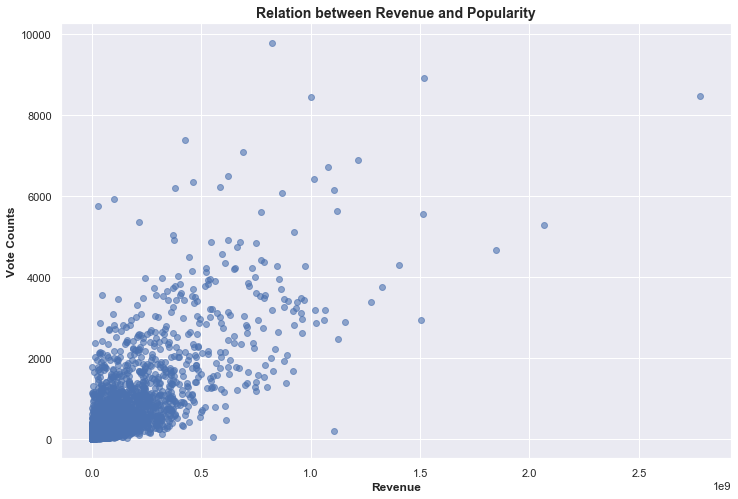

In [27]:
# Plotting the relation between revenue & vote counts
plt.figure(figsize = (12, 8)) # size of the figure
scatter_RP = plt.scatter(df['revenue'], df['vote_count'], alpha = 0.6) 
plt.title("Relation between Revenue and Popularity", fontsize = 14, weight = "bold")
plt.xlabel("Revenue", weight = "bold")
plt.ylabel("Vote Counts", weight = "bold")
plt.show()

 There's a positive correlation between popularity and revenue.


<a id='conclusions'></a>
## Conclusions

>1. The highest number of movies was released in 2011 and the lowest was in 1961
>2. There were more movies released in the 2010s
>3. More movies were released in 2011 followed by 2013.
>4. There were more revenue generated in 1977
>5. Carlos has the Highest runtime of 388 min
>6. There's a positive correlation between popularity and revenue.


<a id='limitations'></a>
## Data Limitations
Although our dataset contains more than 10,000 rows it's pretty insufficient to draw precise conclusions :

1. Most of the data columns are irrelevant for the analysis

2. many NAN values are missing from our dataset for an uncertain reason.

4. The data is outdated it may be good to draw some conclusions if we had better data quality.